In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from lib import *
plt.style.use('../peptidome.mplstyle')

In [36]:
proteomes = ['Human', 'Mouse', 'Chicken', 'Zebrafish', 'Malaria', 'Tuberculosis', 'Listeria', 'StrepA', 'Humanviruses']
models = ['ncov', 'nskew', 'nskewfcov']
k = 9
dkls = pd.DataFrame(data={ model:
                          [float(pd.read_csv('data/{proteome}_{model}_k{k}_dkl.csv'.format(proteome=proteome,
                                                                            model=model, k=k))['Human'])
                            if not proteome == 'Human' else 0.0 for proteome in proteomes]
                          for model in models}
                    , index=proteomes)
dkls

,ncov,nskew,nskewfcov
Human,0.000000,0.000000,0.000000
Mouse,0.004675,0.005751,0.008042
Chicken,0.008983,0.014811,0.026510
Zebrafish,0.031387,0.034851,0.047840
Malaria,1.730172,1.834071,1.975289
Tuberculosis,0.654891,0.698379,0.788998
Listeria,0.426684,0.434977,0.499468
StrepA,0.377792,0.388430,0.480075
Humanviruses,0.120128,0.136197,0.178177


In [37]:
Sind = np.log(naminoacids)*k
dkls_rand = pd.DataFrame(data={ model:
                          [Sind - float(pd.read_csv('data/{proteome}_{model}_k{k}_entropy.csv'.format(proteome=proteome,
                                                                            model=model, k=k),
                                            index_col=0, header=None).loc['S'])
                            for proteome in proteomes]
                          for model in models}
                    , index=proteomes)
dkls_rand

,ncov,nskew,nskewfcov
Human,1.049141,1.105802,1.142894
Mouse,0.995318,1.040346,1.088147
Chicken,0.994480,1.040970,1.081876
Zebrafish,0.915664,0.961872,1.009914
Malaria,2.295436,2.323767,2.454392
Tuberculosis,1.964917,2.031196,2.106428
Listeria,1.254488,1.292934,1.363473
StrepA,1.220455,1.259451,1.354009
Humanviruses,1.032879,1.084267,1.129217


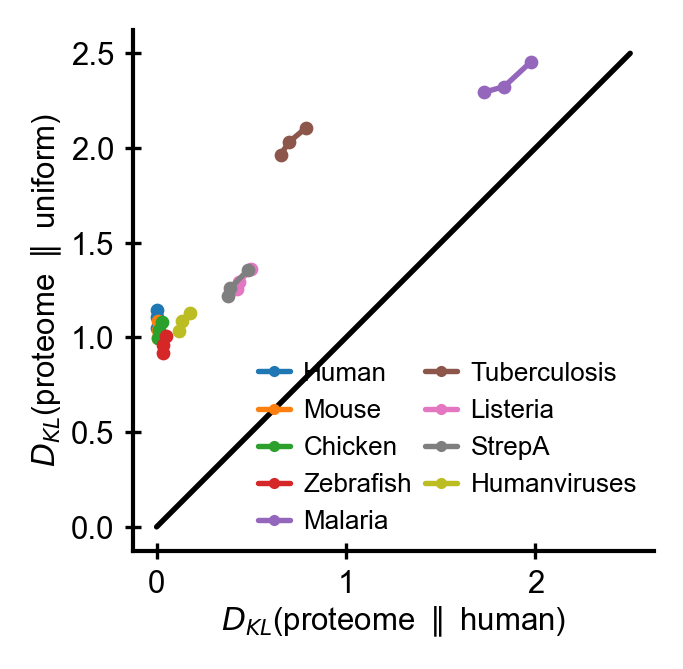

In [52]:
lim = 2.5
fig, ax = plt.subplots()
for proteome in proteomes:
    ax.plot(dkls.loc[proteome], dkls_rand.loc[proteome], '-o', label=proteome)
ax.legend(ncol=2)
ax.plot([0, lim], [0, lim], 'k-')
ax.set_xlabel('$D_{KL}$(proteome $\parallel$ human)')
ax.set_ylabel('$D_{KL}$(proteome $\parallel$ uniform)')
ax.set_aspect('equal')
#ax.set_xlim(-0.0, lim)
#ax.set_ylim(-0.0, lim)

Text(0, 0.5, '$D_{KL}$(proteome $\\parallel$ uniform)')

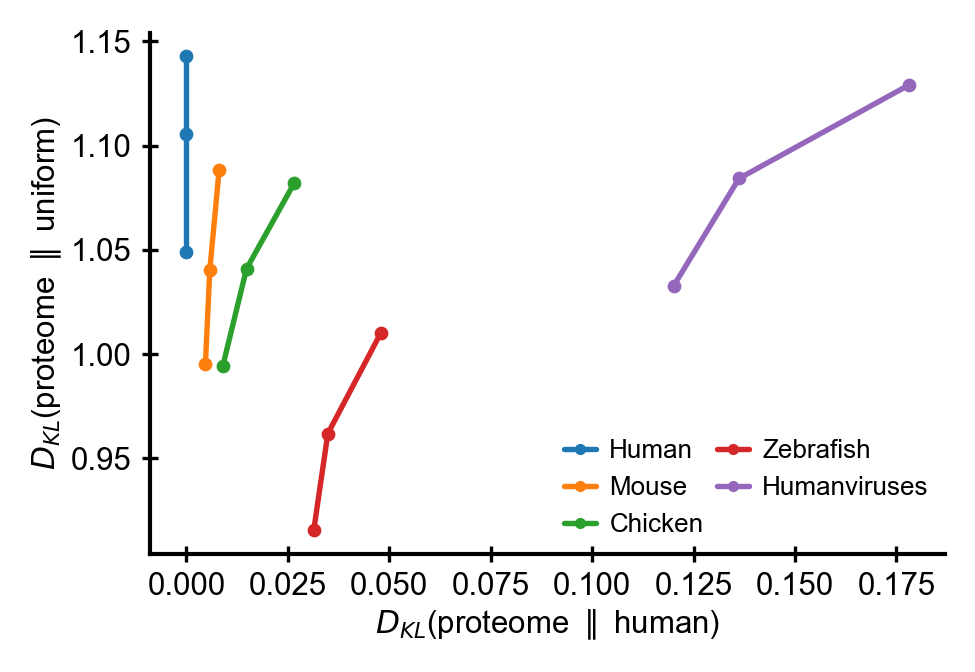

In [55]:
fig, ax = plt.subplots()
for proteome in ['Human', 'Mouse', 'Chicken', 'Zebrafish', 'Humanviruses']:
    ax.plot(dkls.loc[proteome], dkls_rand.loc[proteome], '-o', label=proteome)
ax.legend(ncol=2)
ax.set_xlabel('$D_{KL}$(proteome $\parallel$ human)')
ax.set_ylabel('$D_{KL}$(proteome $\parallel$ uniform)')